In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# read in data files
datadir = "../../DataTD/"
resultsdir = "../../OutputTD/3_models/1_4_cohort_24hrpreadmit/"

# adt_file = datadir + "cohort_1_3_adt.csv"
results_file = resultsdir + "1_4_cohort_test_results.csv"
cohort_file = "../../OutputTD/1_cohort/1_4_cohort.csv"
los_file = datadir + "length_of_stay_labels.csv"

In [16]:
cohort = pd.read_csv(cohort_file)
los = pd.read_csv(los_file)

In [17]:
print(cohort.shape)
print(los.shape)

(43980, 17)
(43765, 9)


In [26]:
43764 + 216

43980

In [18]:
print(los.dtypes)
los.head()

anon_id                                 object
pat_enc_csn_id_coded                     int64
admit_time                              object
first_ED_time                           object
discharge_time                          object
length_of_ip_since_admit                object
length_from_ED_entry_until_discharge    object
death_date_jittered                     object
died_before_discharge                   object
dtype: object


,anon_id,pat_enc_csn_id_coded,admit_time,first_ED_time,discharge_time,length_of_ip_since_admit,length_from_ED_entry_until_discharge,death_date_jittered,died_before_discharge
0,JCe78a06,131062667066,2015-01-02 01:01:00+00:00,2015-01-01 17:10:00+00:00,2015-01-11 23:40:00+00:00,9 days 22:39:00,10 days 06:30:00,2020-01-10 00:00:00+00:00,NaN
1,JCd1c19e,131062745090,2015-01-03 05:53:00+00:00,2015-01-03 01:56:00+00:00,2015-01-07 02:00:00+00:00,3 days 20:07:00,4 days 00:04:00,NaN,NaN
2,JCd91eb2,131062747648,2015-01-01 08:24:00+00:00,2015-01-01 01:10:00+00:00,2015-01-06 03:19:00+00:00,4 days 18:55:00,5 days 02:09:00,2019-01-01 00:00:00+00:00,NaN
3,JCe7cb4d,131062788358,2015-01-01 23:39:00+00:00,2015-01-01 17:07:00+00:00,2015-01-22 01:25:00+00:00,20 days 01:46:00,20 days 08:18:00,NaN,NaN
4,JCe293de,131063044001,2015-01-05 02:23:00+00:00,2015-01-04 18:13:00+00:00,2015-01-05 22:30:00+00:00,0 days 20:07:00,1 days 04:17:00,NaN,NaN


In [28]:
los['admit_time'] = pd.to_datetime(los['admit_time'])
los['discharge_time'] = pd.to_datetime(los['discharge_time'])
los['first_ED_time'] = pd.to_datetime(los['first_ED_time'])
los['death_date_jittered'] = pd.to_datetime(los['death_date_jittered'])    
                                    
los['time_diff_dcdeath'] = round((los.discharge_time - los.death_date_jittered).dt.total_seconds()/(3600.0))

los['hours_ip_since_admit'] = round((los.discharge_time - los.admit_time).dt.total_seconds()/(3600.0))#gets the time in hours

# los['los_hours'] = los['length_of_ip_since_admit'] // 3600

In [29]:
los.head()

,anon_id,pat_enc_csn_id_coded,admit_time,first_ED_time,discharge_time,length_of_ip_since_admit,length_from_ED_entry_until_discharge,death_date_jittered,died_before_discharge,time_diff_dcdeath,hours_ip_since_admit
0,JCe78a06,131062667066,2015-01-02 01:01:00+00:00,2015-01-01 17:10:00+00:00,2015-01-11 23:40:00+00:00,9 days 22:39:00,10 days 06:30:00,2020-01-10 00:00:00+00:00,NaN,-43776.0,239.0
1,JCd1c19e,131062745090,2015-01-03 05:53:00+00:00,2015-01-03 01:56:00+00:00,2015-01-07 02:00:00+00:00,3 days 20:07:00,4 days 00:04:00,NaT,NaN,NaN,92.0
2,JCd91eb2,131062747648,2015-01-01 08:24:00+00:00,2015-01-01 01:10:00+00:00,2015-01-06 03:19:00+00:00,4 days 18:55:00,5 days 02:09:00,2019-01-01 00:00:00+00:00,NaN,-34941.0,115.0
3,JCe7cb4d,131062788358,2015-01-01 23:39:00+00:00,2015-01-01 17:07:00+00:00,2015-01-22 01:25:00+00:00,20 days 01:46:00,20 days 08:18:00,NaT,NaN,NaN,482.0
4,JCe293de,131063044001,2015-01-05 02:23:00+00:00,2015-01-04 18:13:00+00:00,2015-01-05 22:30:00+00:00,0 days 20:07:00,1 days 04:17:00,NaT,NaN,NaN,20.0


array([[<AxesSubplot:title={'center':'time_diff_dcdeath'}>]], dtype=object)

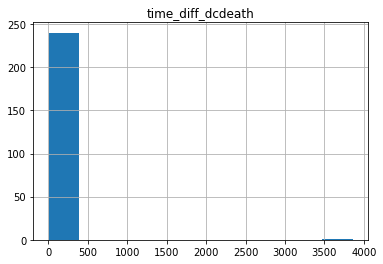

In [32]:
los[los.time_diff_dcdeath > 0].hist(['time_diff_dcdeath'])

array([[<AxesSubplot:title={'center':'time_diff_dcdeath'}>]], dtype=object)

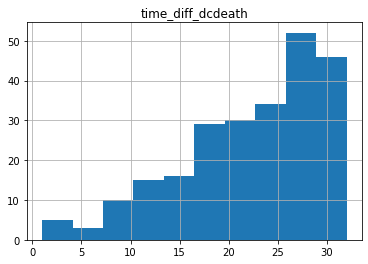

In [35]:
los[(los.time_diff_dcdeath > 0) & (los.time_diff_dcdeath < 500)].hist(['time_diff_dcdeath'])

In [34]:
los[los.time_diff_dcdeath > 0].time_diff_dcdeath.describe()

count     241.000000
mean       38.000000
std       247.385782
min         1.000000
25%        18.000000
50%        24.000000
75%        28.000000
max      3861.000000
Name: time_diff_dcdeath, dtype: float64

In [36]:
los[(los.time_diff_dcdeath > 0) & (los.time_diff_dcdeath < 500)].time_diff_dcdeath.describe()

count    240.000000
mean      22.070833
std        6.999042
min        1.000000
25%       18.000000
50%       24.000000
75%       28.000000
max       32.000000
Name: time_diff_dcdeath, dtype: float64

In [37]:
los[los.pat_enc_csn_id_coded == 131284409583]

,anon_id,pat_enc_csn_id_coded,admit_time,first_ED_time,discharge_time,length_of_ip_since_admit,length_from_ED_entry_until_discharge,death_date_jittered,died_before_discharge,time_diff_dcdeath,hours_ip_since_admit


In [38]:
cohort[cohort.pat_enc_csn_id_coded == 131284409583]

,anon_id,pat_enc_csn_id_coded,inpatient_data_id_coded,admit_time,label_max24,label_24hr_recent,admit_label,has_admit_label,died_within_24hrs,death_24hr_max_label,death_24hr_recent_label,first_label,first_label_minutes_since_admit,acute_to_critical_label_recent,critical_to_acute_label_recent,acute_to_critical_label_max,critical_to_acute_label_max
42983,JCdc9538,131284409583,46725794,2020-03-30 14:37:00+00:00,0,0,0.0,1,1,1,1,0,0.0,1,0,1,0


In [39]:
cohort[cohort.anon_id == 'JCdc9538']

,anon_id,pat_enc_csn_id_coded,inpatient_data_id_coded,admit_time,label_max24,label_24hr_recent,admit_label,has_admit_label,died_within_24hrs,death_24hr_max_label,death_24hr_recent_label,first_label,first_label_minutes_since_admit,acute_to_critical_label_recent,critical_to_acute_label_recent,acute_to_critical_label_max,critical_to_acute_label_max
24753,JCdc9538,131281381262,44823872,2020-01-29 23:50:00+00:00,0,0,0.0,1,0,0,0,0,0.0,0,0,0,0
33407,JCdc9538,131281841915,45116153,2020-02-08 23:05:00+00:00,1,1,1.0,1,0,1,1,1,0.0,0,0,0,0
42983,JCdc9538,131284409583,46725794,2020-03-30 14:37:00+00:00,0,0,0.0,1,1,1,1,0,0.0,1,0,1,0
